<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Logistic_Regression_on_bank_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statements :

### whether the client has subscribed a term deposit or not

### import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

read the csv file

In [ ]:
bank=pd.read_csv('bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#checking the shape
bank.shape

(45211, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#checking any null values in dataset
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#checking the correlation
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Checking which attributes have good impact to predict whether the client has subscribed a term desposit or not.

<Axes: xlabel='y', ylabel='count'>

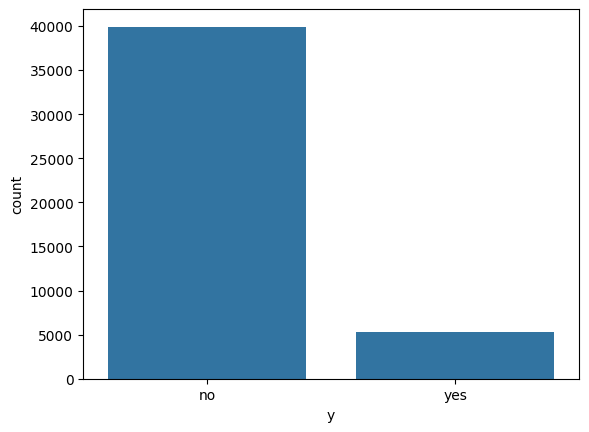

In [ ]:
sns.countplot(x='y',data=bank)

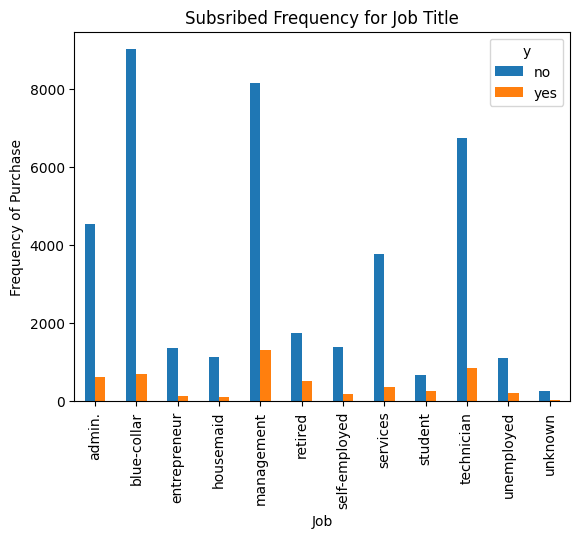

In [ ]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subsribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

## Inference from the above graph:
## All occupations have different type of subscription to term deposit and so this is an important feature

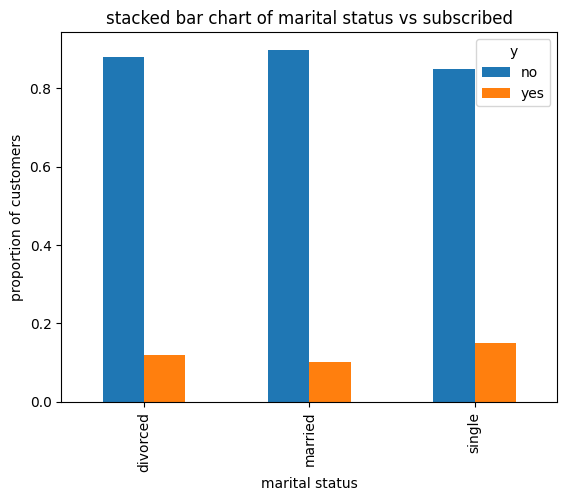

In [ ]:
table=pd.crosstab(bank['marital'],bank['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title ("stacked bar chart of marital status vs subscribed")
plt.xlabel('marital status')
plt.ylabel('proportion of customers')
plt.show()

### People from all status levels have the same frequency, so this is not an important feature the dataset.

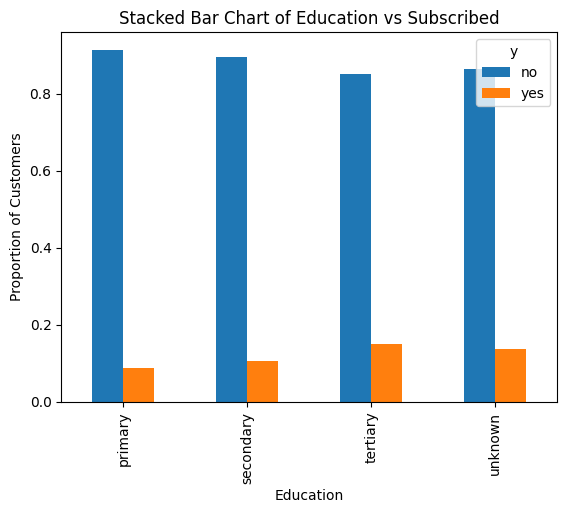

In [ ]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

People with education tend to get subscription to term deposit a little more than people from other education background.

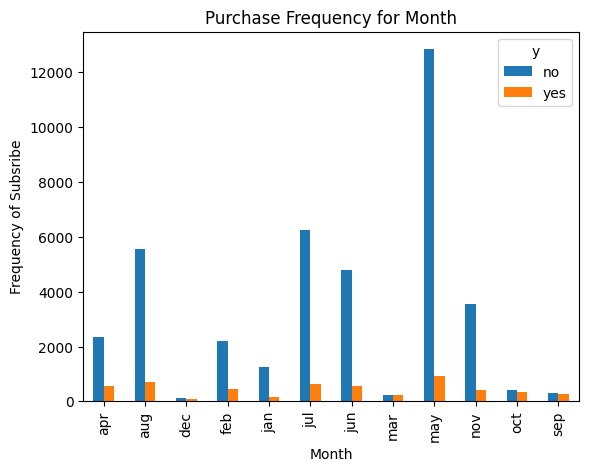

In [ ]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')
plt.show()

## People tend to get term deposit mostly in the month of May

### Checking for outliers with boxplot:

<Axes: ylabel='age'>

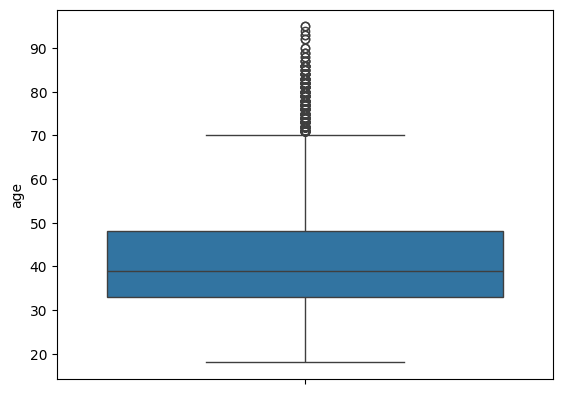

In [ ]:
sns.boxplot(bank['age'])

<Axes: title={'center': 'age'}, xlabel='y'>

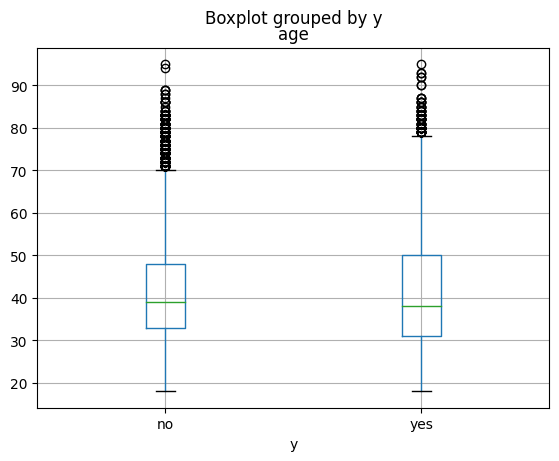

In [ ]:
bank.boxplot(column='age', by='y')

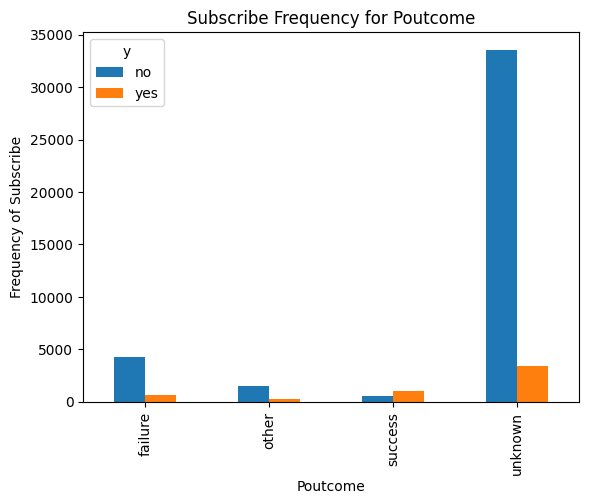

In [ ]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')
plt.show()

## The remaining column features:
The day column - Refers to the last contact day of the month, based on which, it is hard to say, if the client will subscirbe to term deposit or not

The campaign column - Refers to the number of contacts performed during this campaign and for this client it may be baised. It also varies from client to client. Thus, it is not important feature

The pdays column - Refers to the number of days that have passed by, after the client was last contacted from a previous campaign. Thus this feature is similar to the can They dont contribute in predicting if the client subscribe to term deposit or not

Thus, dropping all the unimportant features form the data, before constructing a model

In [ ]:
bank.drop(columns=['month','education','pdays','day','campaign','age','loan','housing','marital'],axis=1,inplace=True)

In [ ]:
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


### We will creat dummy variables for the categorical data

In [ ]:
con=pd.get_dummies(bank['contact'],drop_first=True)

In [ ]:
job=pd.get_dummies(bank['job'],drop_first=True)

In [ ]:
pout=pd.get_dummies(bank['poutcome'],drop_first=True)

In [ ]:
de=pd.get_dummies(bank['default'],drop_first=True)

In [ ]:
bank=pd.concat([bank,de,pout,job,con],axis=1)
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


### we will drop the exist categorical columns .

In [ ]:
bank.drop(columns=['default','poutcome','job','contact'],axis=1,inplace=True)

In [ ]:
bank.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
bank_new= bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


### Seperating the independent and Target variable, before contructing a model

In [ ]:
x=bank.drop('y',axis=1)
y=bank['y']

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

### Predicting for the built model

In [ ]:
y_pred = classifier.predict(x)
y_pred_prob= classifier.predict_proba(x)
y_pred_prob

array([[0.97641671, 0.02358329],
       [0.98507704, 0.01492296],
       [0.99002687, 0.00997313],
       ...,
       [0.00853741, 0.99146259],
       [0.88227657, 0.11772343],
       [0.87911008, 0.12088992]])

### Evaluation metrics to identify the missclassified classes using confusion matrix and find the accuracy of the prediction:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix=confusion_matrix(y,y_pred)
accuracy=accuracy_score(y,y_pred)
print(cm,accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


# Accuracy of model is 90% it is good model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



# ROC Curve

In [ ]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
y_predict=label_encoder.fit_transform(y_pred)
y_actual= label_encoder.fit_transform(bank_new['y'])

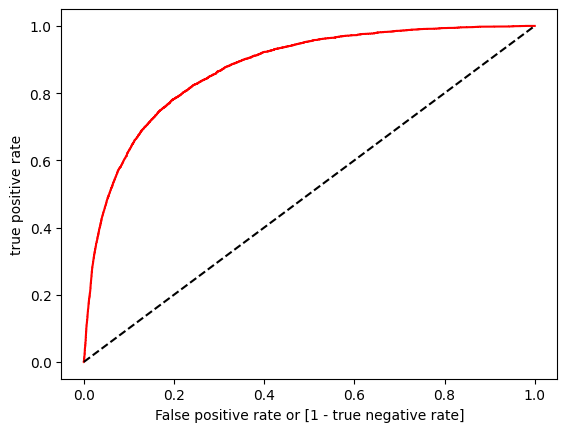

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_actual, classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y_actual,y_predict)
plt.plot(fpr,tpr,color='red',label='logit model(area =%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate or [1 - true negative rate]')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
auc

0.6477134406230929

In [ ]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [ ]:
fpr

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.95541306e-01, 9.95641501e-01, 1.00000000e+00])

In [ ]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.109026


# Conclusion:

EDA is performed and a model is constructed only by considering the required and features that significantly contribute to the client subscribing to the term deposit.

From the ROC curve, it is evident that, the area under curve is 64.8%, which means that by an approximation of 65%, it can be used to predict the true positive rate. It is baised beacuse, the dataset has been a large frequency of negative results

The precision, senstivity (true positive rate), Specificity (true negative rate ) and F1-score are also biased because the dataset has a large frequency of negative result

precision - no (0.92) and yes ( 0.65 )
recall - no (0.98) and yes ( 0.32 )
f1-score - no (0.95) and yes ( 0.43 )
support - no ( 39922) and yes ( 5289 )

Thus, the created model gives 90% accurate prediction for the client to subscribe the term deposit